In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics

In [2]:
A = np.random.uniform(low=0,high=4,size=(50,2))
B = np.random.uniform(low=0,high=4,size=(50,2))
C = np.random.normal(0,0.3,(10,2))
B[:,0] += 3
C[:,0] += 6
C[:,1] += 1.5
A = np.concatenate((A,C),axis=0)

# Dataset

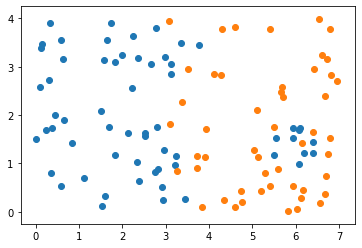

In [3]:
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1])
plt.show()

In [4]:
A_l = np.zeros(60)
B_l = np.ones(50)

In [5]:
X = np.concatenate((A,B))
y = np.concatenate((A_l,B_l))

In [6]:
c_test = np.linspace(0.001,1,1000)

# Linear

In [7]:
acc_scores = []
margin_sizes = []
for c in c_test:
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    acc_scores += [metrics.accuracy_score(y, y_pred)]
    margin_sizes += [1 / np.sqrt(np.sum(clf.coef_ ** 2))]

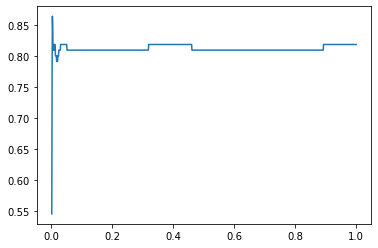

In [8]:
plt.plot(c_test,acc_scores)

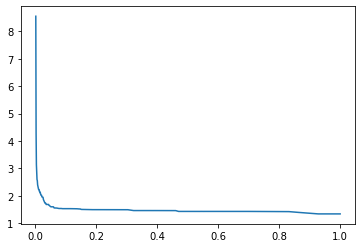

In [9]:
plt.plot(c_test,margin_sizes)

In [10]:
optimal_c = c_test[np.argmax(acc_scores)]
print('Optimal C ',optimal_c)
print('Max score ',np.max(acc_scores))

Optimal C  0.003
Max score  0.8636363636363636


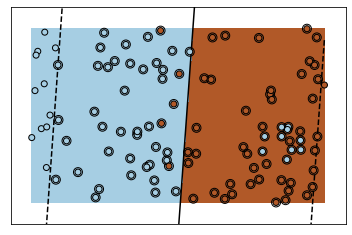

In [11]:
clf = svm.SVC(kernel='linear', C=optimal_c)
clf.fit(X, y)

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x_min, x_max)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_up, 'k--')
plt.plot(xx, yy_down, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)

plt.xlim(x_min-.5, x_max+.5)
plt.ylim(y_min-.5, y_max+.5)

plt.xticks(())
plt.yticks(())

plt.show()

# Poly

In [12]:
acc_scores = []
margin_sizes = []
for c in c_test:
    clf = svm.SVC(kernel='poly', C=c,gamma='auto')
    clf.fit(X, y)
    y_pred = clf.predict(X)
    acc_scores += [metrics.accuracy_score(y, y_pred)]

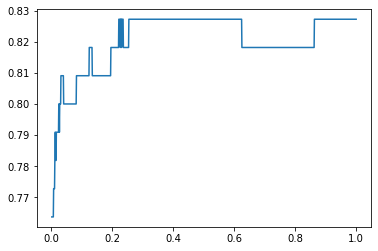

In [13]:
plt.plot(c_test,acc_scores)

In [14]:
optimal_c = c_test[np.argmax(acc_scores)]
print('Optimal C ',optimal_c)
print('Max score ',np.max(acc_scores))

Optimal C  0.221
Max score  0.8272727272727273


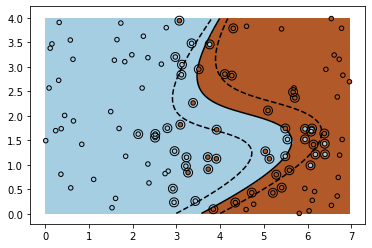

In [15]:
clf = svm.SVC(kernel='poly', C=optimal_c,gamma='auto')
clf.fit(X, y)
plt.figure()
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolor='k', s=20)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.show()

# RBFs

Sklearn uses RBF kernel of form  
k(x_i, x_j) = exp(-1 / 2 d(x_i / length_scale, x_j / length_scale)^2)

## RBF for gamma = 10

In [16]:
acc_scores = []
margin_sizes = []
for c in c_test:
    clf = svm.SVC(kernel='rbf', C=c,gamma=10)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    acc_scores += [metrics.accuracy_score(y, y_pred)]

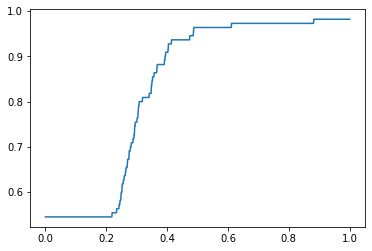

In [17]:
plt.plot(c_test,acc_scores)

In [18]:
optimal_c = c_test[np.argmax(acc_scores)]
print('Optimal C ',optimal_c)
print('Max score ',np.max(acc_scores))

Optimal C  0.882
Max score  0.9818181818181818


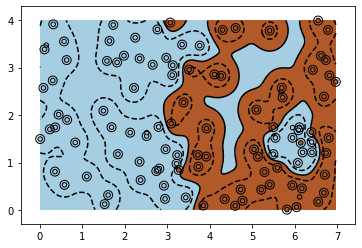

In [19]:
clf = svm.SVC(kernel='rbf', C=optimal_c,gamma=10)
clf.fit(X, y)
plt.figure()
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm
            .Paired,
            edgecolor='k', s=20)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.show()

## RBF for gamma = 1

In [20]:
acc_scores = []
margin_sizes = []
for c in c_test:
    clf = svm.SVC(kernel='rbf', C=c,gamma=1)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    acc_scores += [metrics.accuracy_score(y, y_pred)]

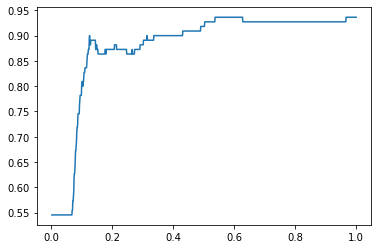

In [21]:
plt.plot(c_test,acc_scores)

In [22]:
optimal_c = c_test[np.argmax(acc_scores)]
print('Optimal C ',optimal_c)
print('Max score ',np.max(acc_scores))

Optimal C  0.537
Max score  0.9363636363636364


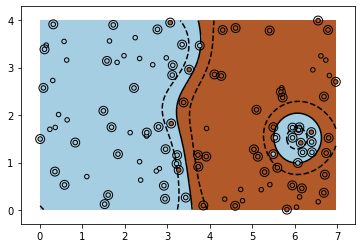

In [23]:
clf = svm.SVC(kernel='rbf', C=optimal_c,gamma=1)
clf.fit(X, y)
plt.figure()
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm
            .Paired,
            edgecolor='k', s=20)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.show()

## RBF for gamma = 0.5

In [24]:
acc_scores = []
margin_sizes = []
for c in c_test:
    clf = svm.SVC(kernel='rbf', C=c,gamma=.5)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    acc_scores += [metrics.accuracy_score(y, y_pred)]

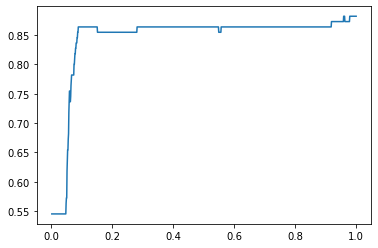

In [25]:
plt.plot(c_test,acc_scores)

In [26]:
optimal_c = c_test[np.argmax(acc_scores)]
print('Optimal C ',optimal_c)
print('Max score ',np.max(acc_scores))

Optimal C  0.9590000000000001
Max score  0.8818181818181818


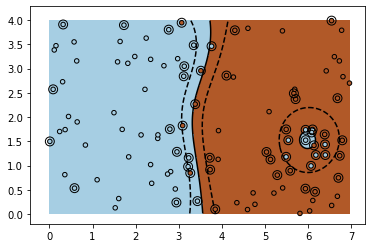

In [27]:
clf = svm.SVC(kernel='rbf', C=optimal_c,gamma=.5)
clf.fit(X, y)
plt.figure()
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm
            .Paired,
            edgecolor='k', s=20)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

plt.show()